<a href="https://colab.research.google.com/github/HaripriyaVennam/Neural-Networks-and-Deep-Learning/blob/main/ICP4/ICP_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
path_to_csv = 'diabetes.csv'

In [3]:
import keras
import pandas
from keras.models import Sequential
from keras.layers import Dense, Activation

# load dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

dataset = pd.read_csv(path_to_csv, header=None).values

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8],
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # hidden layer
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.5092 - loss: 6.2854
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5621 - loss: 3.2284 
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6476 - loss: 2.1968 
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6399 - loss: 2.2527 
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6096 - loss: 1.8760 
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6328 - loss: 1.8528 
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5826 - loss: 1.6974 
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6342 - loss: 1.3188 
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5758 - loss: 1.4239 
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5668 - loss: 1.1919 
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6336 - loss: 1.2077 
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5953 - loss: 1.1462 
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 605 (2.37 KB)

 Trainable params: 201 (804.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 404 (1.58 KB)

None
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.6856 - loss: 0.5914  
[0.6197686791419983, 0.6666666865348816]


In [4]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(28, 28)
784
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.8412 - loss: 0.5145 - val_accuracy: 0.9543 - val_loss: 0.1475
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9652 - loss: 0.1107 - val_accuracy: 0.9689 - val_loss: 0.0987
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9792 - loss: 0.0666 - val_accuracy: 0.9755 - val_loss: 0.0766
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9868 - loss: 0.0418 - val_accuracy: 0.9630 - val_loss: 0.1172
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9907 - loss: 0.0303 - val_accuracy: 0.9736 - val_loss: 0.0868
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9935 - loss: 0.0199 - val_accuracy: 0.9789 - val_loss: 0.0740
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9956 - loss: 0.0151 - val_accuracy: 0.9808 - val_loss: 0.0661
Epoch 8/10
235/235 ━━━━━━━━━━━━━

In [5]:
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split

# load dataset
path_to_csv = 'diabetes.csv'
dataset = pd.read_csv(path_to_csv, header=None).values

# split dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8],
                                                    test_size=0.25, random_state=87)

# define the model
np.random.seed(155)
my_second_nn = Sequential()
my_second_nn.add(Dense(20, input_dim=8, activation='relu'))
my_second_nn.add(Dense(20, input_dim=8,activation='relu'))
my_second_nn.add(Dense(20, input_dim=8,activation='relu'))
my_second_nn.add(Dense(1, activation='sigmoid'))
my_second_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
my_second_nn_fitted= my_second_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)


# evaluate the model on the test set
score = my_second_nn.evaluate(X_test, Y_test, batch_size=64)
print(my_second_nn.summary())
print("Test accuracy:", score[1])

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5064 - loss: 2.2516
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5833 - loss: 1.0065 
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6388 - loss: 0.8044 
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6596 - loss: 0.6763 
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6533 - loss: 0.7387 
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6584 - loss: 0.7244 
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6416 - loss: 0.6683 
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6584 - loss: 0.6560 
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6776 - loss: 0.6563 
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6548 - loss: 0.6332 
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6810 - loss: 0.6176 
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 20)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,125 (12.21 KB)

 Trainable params: 1,041 (4.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,084 (8.14 KB)

None
Test accuracy: 0.6927083134651184


In [6]:
path_to_csv = 'breastcancer.csv'

In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load dataset
data = load_breast_cancer()

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target,
                                                    test_size=0.25, random_state=87)

# Normalize data
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

# Create model
np.random.seed(155)
model = Sequential()
model.add(Dense(20, input_dim=30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train_norm, y_train, epochs=100, initial_epoch=0)

# Evaluate model on testing set
loss, accuracy = model.evaluate(X_test_norm, y_test)
print(model.summary())
print("Loss:", loss)
print("Accuracy:", accuracy)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7508 - loss: 0.5450
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8704 - loss: 0.4046
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9044 - loss: 0.3243
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9129 - loss: 0.2821
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9392 - loss: 0.2257
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9357 - loss: 0.1975
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9617 - loss: 0.1571
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9519 - loss: 0.1536
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9692 - loss: 0.1457
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9741 - loss: 0.1214
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9629 - loss: 0.1403  
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.964

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,925 (7.52 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,284 (5.02 KB)

None
Loss: 0.0972914770245552
Accuracy: 0.9790209531784058


2nd program

In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(28, 28)
784


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.8401 - loss: 0.5203 - val_accuracy: 0.9598 - val_loss: 0.1320
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9686 - loss: 0.1062 - val_accuracy: 0.9660 - val_loss: 0.1041
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.9799 - loss: 0.0639 - val_accuracy: 0.9777 - val_loss: 0.0756
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9860 - loss: 0.0432 - val_accuracy: 0.9792 - val_loss: 0.0716
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9901 - loss: 0.0306 - val_accuracy: 0.9803 - val_loss: 0.0666
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9934 - loss: 0.0212 - val_accuracy: 0.9806 - val_loss: 0.0661
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9950 - loss: 0.0164 - val_accuracy: 0.9836 - val_loss: 0.0572
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9976 - loss: 0.0089 - va

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.8341 - loss: 0.5314 - val_accuracy: 0.9516 - val_loss: 0.1582
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9664 - loss: 0.1075 - val_accuracy: 0.9591 - val_loss: 0.1237
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9788 - loss: 0.0675 - val_accuracy: 0.9611 - val_loss: 0.1233
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9858 - loss: 0.0434 - val_accuracy: 0.9704 - val_loss: 0.0943
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9907 - loss: 0.0296 - val_accuracy: 0.9799 - val_loss: 0.0625
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9926 - loss: 0.0236 - val_accuracy: 0.9784 - val_loss: 0.0746
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9954 - loss: 0.0154 - val_accuracy: 0.9804 - val_loss: 0.0675
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9971 - loss: 0.0104 - val_a

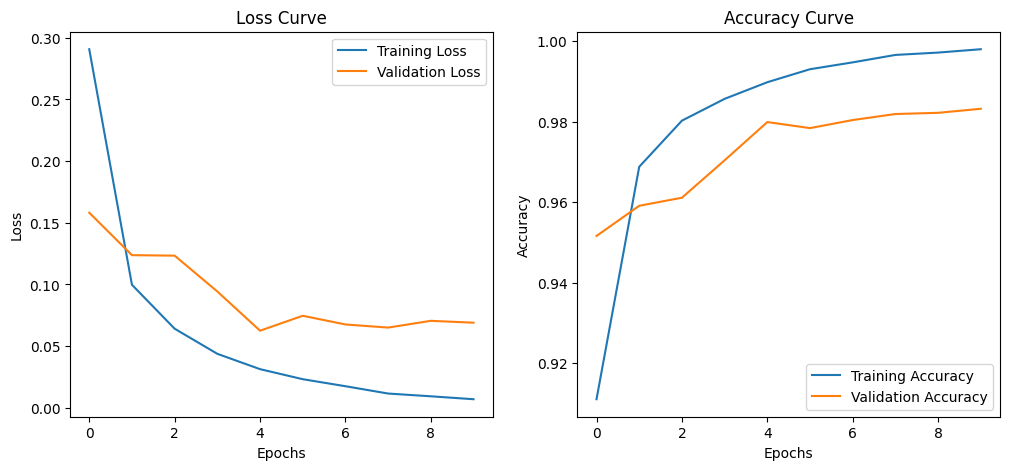

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape data: 28x28 images to a 1D vector of 784 features
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData).astype('float32') / 255.0
test_data = test_images.reshape(test_images.shape[0], dimData).astype('float32') / 255.0

# Convert labels to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Create the model
model = Sequential([
    Dense(512, activation='relu', input_shape=(dimData,)),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                    validation_data=(test_data, test_labels_one_hot))

# Plot training & validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.show()


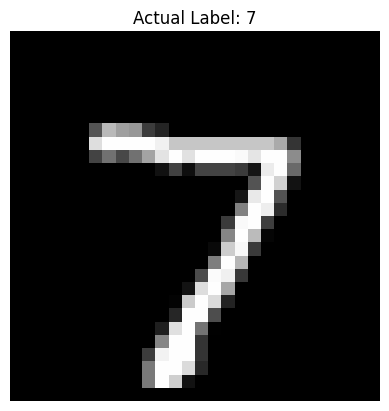

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Predicted Label: 7


In [3]:
# Pick an image from the test set
image_index = 0  # Change this index to see different images
test_image = test_images[image_index]

# Display the image
plt.imshow(test_image, cmap='gray')
plt.title(f"Actual Label: {test_labels[image_index]}")
plt.axis('off')
plt.show()

# Preprocess the image for prediction
image_reshaped = test_image.reshape(1, dimData).astype('float32') / 255.0  # Reshape & normalize

# Predict the class
prediction = model.predict(image_reshaped)
predicted_label = np.argmax(prediction)

print(f"Predicted Label: {predicted_label}")


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.8058 - loss: 0.6205 - val_accuracy: 0.9049 - val_loss: 0.3084
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9457 - loss: 0.1788 - val_accuracy: 0.9658 - val_loss: 0.1104
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.9694 - loss: 0.1028 - val_accuracy: 0.9615 - val_loss: 0.1243
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.9791 - loss: 0.0680 - val_accuracy: 0.9643 - val_loss: 0.1062
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9851 - loss: 0.0501 - val_accuracy: 0.9707 - val_loss: 0.0911
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.9880 - loss: 0.0359 - val_accuracy: 0.9666 - val_loss: 0.1059
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9920 - loss: 0.0263 - val_accuracy: 0.9801 - val_loss: 0.0661
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9955 - loss: 0.0164 - v

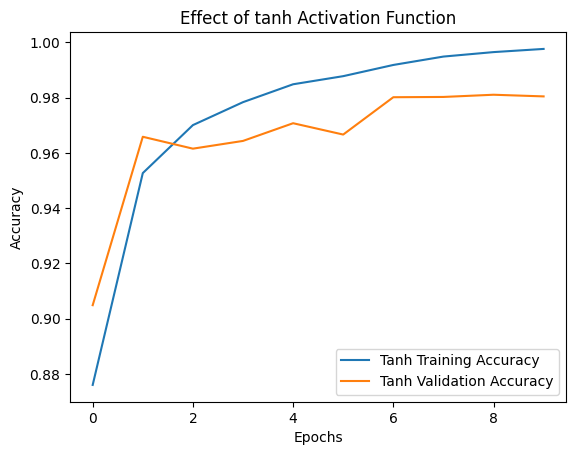

In [4]:
# Create a modified model
model_tanh = Sequential([
    Dense(512, activation='tanh', input_shape=(dimData,)),
    Dense(512, activation='tanh'),
    Dense(512, activation='tanh'),  # Additional layer
    Dense(10, activation='softmax')
])

# Compile the model
model_tanh.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_tanh = model_tanh.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                              validation_data=(test_data, test_labels_one_hot))

# Plot accuracy
plt.plot(history_tanh.history['accuracy'], label='Tanh Training Accuracy')
plt.plot(history_tanh.history['val_accuracy'], label='Tanh Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of tanh Activation Function')
plt.show()


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.5820 - loss: 1.3278 - val_accuracy: 0.8663 - val_loss: 0.4288
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.8973 - loss: 0.3447 - val_accuracy: 0.9195 - val_loss: 0.2788
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.9190 - loss: 0.2714 - val_accuracy: 0.9292 - val_loss: 0.2393
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9320 - loss: 0.2299 - val_accuracy: 0.9331 - val_loss: 0.2174
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9417 - loss: 0.1943 - val_accuracy: 0.9371 - val_loss: 0.2026
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9486 - loss: 0.1698 - val_accuracy: 0.9510 - val_loss: 0.1552
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9554 - loss: 0.1485 - val_accuracy: 0.9553 - val_loss: 0.1496
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9601 - loss: 0.1309 - val_a

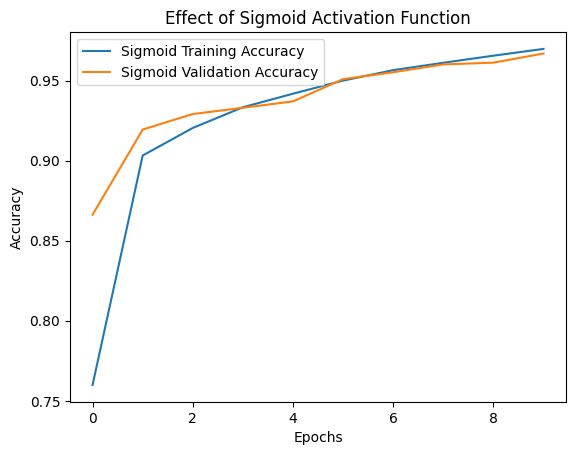

In [5]:
# Create a modified model with sigmoid activation
model_sigmoid = Sequential([
    Dense(512, activation='sigmoid', input_shape=(dimData,)),
    Dense(512, activation='sigmoid'),
    Dense(10, activation='softmax')
])

# Compile the model
model_sigmoid.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_sigmoid = model_sigmoid.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                                    validation_data=(test_data, test_labels_one_hot))

# Plot accuracy
plt.plot(history_sigmoid.history['accuracy'], label='Sigmoid Training Accuracy')
plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of Sigmoid Activation Function')
plt.show()


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.8069 - loss: 15.8401 - val_accuracy: 0.9004 - val_loss: 0.8353
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9451 - loss: 0.4411 - val_accuracy: 0.9499 - val_loss: 0.3088
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9591 - loss: 0.2469 - val_accuracy: 0.9521 - val_loss: 0.3143
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9662 - loss: 0.1858 - val_accuracy: 0.9579 - val_loss: 0.2811
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9712 - loss: 0.1752 - val_accuracy: 0.9594 - val_loss: 0.3460
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9772 - loss: 0.1463 - val_accuracy: 0.9496 - val_loss: 0.4762
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9794 - loss: 0.1403 - val_accuracy: 0.9572 - val_loss: 0.4405
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9807 - loss: 0.1309 - val_ac

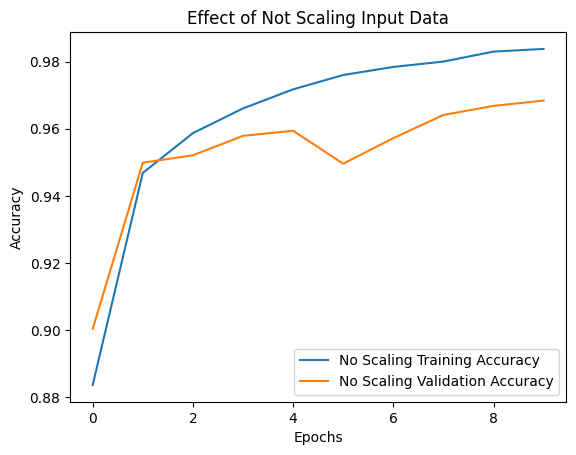

In [6]:
# Reshape data without scaling (values remain 0-255)
train_data_raw = train_images.reshape(train_images.shape[0], dimData).astype('float32')
test_data_raw = test_images.reshape(test_images.shape[0], dimData).astype('float32')

# Create the model
model_no_scaling = Sequential([
    Dense(512, activation='relu', input_shape=(dimData,)),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_no_scaling.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_no_scaling = model_no_scaling.fit(train_data_raw, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                                          validation_data=(test_data_raw, test_labels_one_hot))

# Plot accuracy to compare
plt.plot(history_no_scaling.history['accuracy'], label='No Scaling Training Accuracy')
plt.plot(history_no_scaling.history['val_accuracy'], label='No Scaling Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of Not Scaling Input Data')
plt.show()


https://drive.google.com/file/d/1i-tEHpd55n8V7ECR4D4CrmzQOHoPOWdW/view?usp=drive_link